# Insight Data Science Consulting Project: 80,000 hours - Chapter 2

Note: this is a part of a consulting project with [80,000 hours](https://80000hours.org/).

## Stage 1: Ask a question

My objective is to rank skills (and possibly knowledge, tools & tech) based on how valuable they are. The skills are listed by US Department of Labor [here](https://www.onetonline.org/find/descriptor/browse/Skills/2.B.1/).

There is no performance measure for this rank yet since it is subjective. Yet in the future, one can create a poll to rate pairwise. 

## Stage 2: Set the environment up and get data

First, set up a directory for data and link it to this workplace. Download data into your choice of directory.

In [3]:
#Set up the environment
import pandas as pd                        #Pandas
import numpy as np                         #Numpy
import pycurl                              #For saving file from url
import os                                  #For checking if a file exists
from pandas.parser import CParserError     #For checking if a file contains a set of values
import matplotlib.pyplot as plt            #For plotting
import matplotlib
%matplotlib inline

#Some machine learning tools
from sklearn.linear_model import LassoCV, LassoLarsCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, f_regression

# Set up data directory
DataDir = "C:/Users/Admin/Desktop/Insight/80000hrs/"

## Stage 3: Feature exploration

In this stage, we look into data. Let's focus on Skills for now.

### Stage 3.1: Skills

In [4]:
filename = "01/dSkill.csv"
dSkill = pd.read_csv(DataDir+filename)
dSkill = dSkill.drop('Unnamed: 0', 1)

In [5]:
dSkill.shape

(953, 36)

In [6]:
dSkill[:5]

,SOC code,Active Learning,Active Listening,Complex Problem Solving,Coordination,Critical Thinking,Equipment Maintenance,Equipment Selection,Installation,Instructing,...,Science,Service Orientation,Social Perceptiveness,Speaking,Systems Analysis,Systems Evaluation,Technology Design,Time Management,Troubleshooting,Writing
0,11-1011.00,75,78,85,81,85,0,3,0,53,...,22,53,81,85,78,78,19,75,0,75
1,11-1011.03,63,72,75,66,75,0,3,0,56,...,19,56,69,75,66,66,16,60,3,72
2,11-1021.00,63,75,63,75,72,0,0,0,53,...,22,56,75,75,50,50,22,69,25,56
3,11-2011.00,56,75,63,63,69,0,6,0,47,...,13,53,75,75,53,50,16,72,3,69
4,11-2021.00,72,72,66,63,72,0,0,0,50,...,19,53,72,72,56,63,19,63,0,56


Let's create a color map.

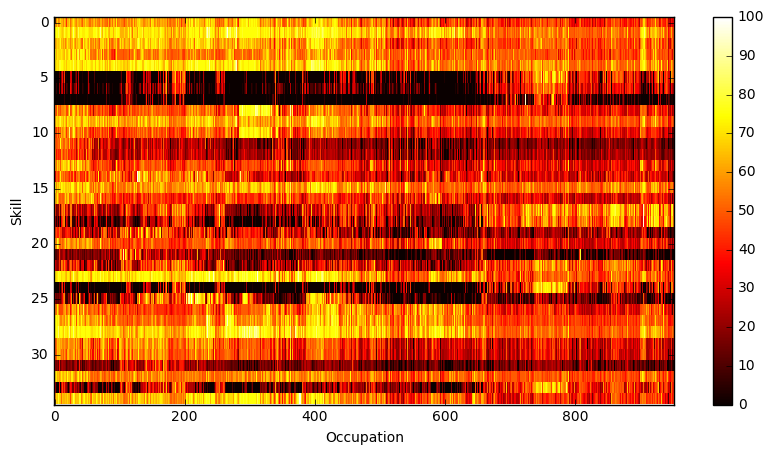

In [7]:
fig = plt.figure(figsize=(10,5))
ax1  = fig.add_subplot(111)
plt.xlabel("Occupation")
plt.ylabel("Skill")
plt.imshow(dSkill.set_index('SOC code').T, cmap='hot', interpolation='nearest',aspect='auto')
plt.colorbar();

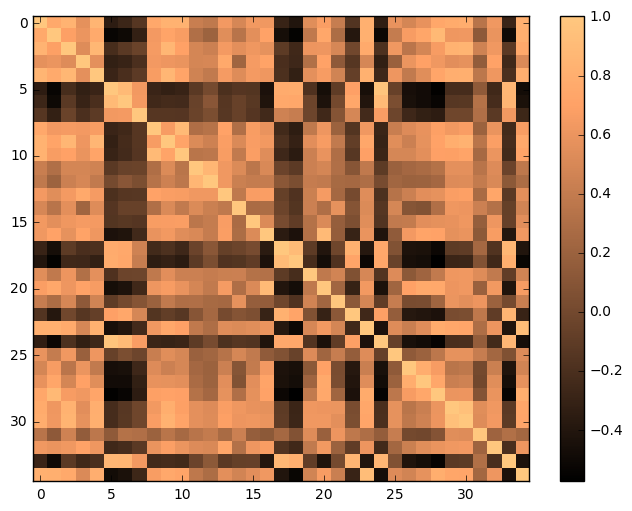

In [8]:
#Correlation matrix
CorrMatrix = dSkill.set_index('SOC code').corr()
fig = plt.figure(figsize=(8,6))
ax1  = fig.add_subplot(111)
#plt.xlabel("Occupation")
#plt.ylabel("Skill + Knowledge")
plt.imshow(CorrMatrix.T, cmap='copper', interpolation='nearest',aspect='auto')
plt.colorbar();

In [9]:
for i in range(1,len(CorrMatrix)):
    for j in range(0,i):
        if CorrMatrix.loc[CorrMatrix.index[j],CorrMatrix.columns[i]]>0.9:
            print [CorrMatrix.index[j],CorrMatrix.columns[i]]

['Operation Monitoring', 'Operation and Control']
['Equipment Maintenance', 'Repairing']
['Equipment Selection', 'Repairing']
['Systems Analysis', 'Systems Evaluation']
['Reading Comprehension', 'Writing']


### Stage 3.2: Knowledge

In [10]:
# filename = "dKnowledge.csv"
# dKnowledge = pd.read_csv(DataDir+filename)
# dKnowledge = dKnowledge.drop('Unnamed: 0', 1)

In [11]:
# dKnowledge.shape

In [12]:
# dKnowledge[:5]

In [13]:
# fig = plt.figure(figsize=(10,5))
# ax1  = fig.add_subplot(111)
# plt.xlabel("Occupation")
# plt.ylabel("Knowledge")
# plt.imshow(dKnowledge.set_index('SOC code').T, cmap='cool', interpolation='nearest',aspect='auto')
# plt.colorbar();

In [14]:
# #Correlation matrix
# CorrMatrix = dKnowledge.set_index('SOC code').corr()
# fig = plt.figure(figsize=(8,6))
# ax1  = fig.add_subplot(111)
# #plt.xlabel("Occupation")
# #plt.ylabel("Skill + Knowledge")
# plt.imshow(CorrMatrix.T, cmap='cool', interpolation='nearest',aspect='auto')
# plt.colorbar();

In [15]:
# for i in range(1,len(CorrMatrix)):
#     for j in range(0,i):
#         if CorrMatrix.loc[CorrMatrix.index[j],CorrMatrix.columns[i]]>0.9:
#             print [CorrMatrix.index[j],CorrMatrix.columns[i]]

### Stage 3.3: Outputs

In this round, we will focus on transferability. So, we will use only job openings.

In [16]:
filename = "01/dJobOpenings.csv"
dJobOpenings = pd.read_csv(DataDir+filename)
dJobOpenings = dJobOpenings.drop('Unnamed: 0', 1)

In [17]:
filename = "01/dJobZone.csv"
dJobZone = pd.read_csv(DataDir+filename)
dJobZone = dJobZone.drop('Unnamed: 0', 1)

In [18]:
filename = "01/dRiskOfAutomation.csv"
dRiskOfAutomation = pd.read_csv(DataDir+filename)
dRiskOfAutomation = dRiskOfAutomation.drop('Unnamed: 0', 1)

In [19]:
filename = "01/dLevelOfCompetition.csv"
dLevelOfCompetition = pd.read_csv(DataDir+filename)
dLevelOfCompetition = dLevelOfCompetition.drop('Unnamed: 0', 1)

In [20]:
filename = "01/dWage_BLS.csv"
dWage_BLS = pd.read_csv(DataDir+filename)
dWage_BLS = dWage_BLS.drop('Unnamed: 0', 1)

In [21]:
filename = "01/dJobSatisfaction_GSS.csv"
dJobSatisfaction_GSS = pd.read_csv(DataDir+filename)
dJobSatisfaction_GSS = dJobSatisfaction_GSS.drop('Unnamed: 0', 1)

#in order to run regression, we need to group by occupations first
#summarize by occupations
dJobSatisfaction_GSS = dJobSatisfaction_GSS.groupby(['SOC code']).mean().reset_index()

In [22]:
filename = "01/dPayScale.csv"
dJobSatisfaction_PayScale = pd.read_csv(DataDir+filename)
dJobSatisfaction_PayScale = dJobSatisfaction_PayScale.drop('Unnamed: 0', 1)
dJobSatisfaction_PayScale = dJobSatisfaction_PayScale.drop(['Median Pay', 'High Meaning'], axis = 1)
dJobSatisfaction_PayScale.rename(columns={'High Satisfaction':'JobSatisfaction_PayScale'}, inplace=True)

In [23]:
filename = "01/dPayScale.csv" 
dWage_PayScale = pd.read_csv(DataDir+filename)
dWage_PayScale = dWage_PayScale.drop('Unnamed: 0', 1)
dWage_PayScale = dWage_PayScale.drop(['High Satisfaction', 'High Meaning'], axis = 1)
dWage_PayScale.rename(columns={'Median Pay':'Wage_PayScale'}, inplace=True)

In [24]:
filename = "01/dPayScale.csv" 
dJobMeaning_PayScale = pd.read_csv(DataDir+filename)
dJobMeaning_PayScale = dJobMeaning_PayScale.drop('Unnamed: 0', 1)
dJobMeaning_PayScale = dJobMeaning_PayScale.drop(['High Satisfaction', 'Median Pay'], axis = 1)
dJobMeaning_PayScale.rename(columns={'High Meaning':'JobMeaning_PayScale'}, inplace=True)

## Stage 4: Score for all measures

At this point, we are going to develop a score for each measure. Transferabiltiy is a unique one: how often a skill appears across different occupations weighed with job openings.

In [25]:
#Define what you want to work on first.
interest = 'Skill'
#interest = 'Knowledge'

In [26]:
dSummary = pd.DataFrame()

In [27]:
exec('d = d'+interest)
d.loc[:,'SOC code'] = d['SOC code'].map(lambda x: x[0:7])
d = d.groupby(['SOC code']).mean()
d = d.reset_index()
dbasis = d

In [28]:
#merge dJobOpenings and skills/knowledge
dbig = dJobOpenings.merge(dbasis, left_on='SOC code',  right_on='SOC code', how ='left')
dbig = dbig.dropna()
dbig = dbig.set_index('SOC code')

for i in range(1,len(dbig.columns)):
    for j in dbig.index:
        dbig.loc[j,dbig.columns[i]] = dbig.loc[j,dbig.columns[i]]*dbig.loc[j,'JobOpenings']

dbig = dbig.drop('JobOpenings',axis=1)

d = pd.DataFrame(dbig.sum(axis =0),columns = ['value'])
mean = d['value'].mean()
d['ratio'] = d['value']/mean

np.min(d['ratio']), np.max(d['ratio'])

(0.10845285341582284, 1.769503857627116)

In [29]:
dSummary['Transferability'] = d['ratio'] -1

This creates a score telling how much a skill can make a difference relative to the mean value.

Now let's move on to other measures. They are related to linear regression.

In [30]:
filename = "01/dSkill.csv"
dSkill = pd.read_csv(DataDir+filename)
dSkill = dSkill.drop('Unnamed: 0', 1)

# filename = "dKnowledge.csv"
# dKnowledge = pd.read_csv(DataDir+filename)
# dKnowledge = dKnowledge.drop('Unnamed: 0', 1)

In [31]:
def regression(X_train, y_train):    
    # Create the RFE object and compute a cross-validated score.
    LR = LinearRegression()
    rfecv = RFECV(estimator=LR, step=1, cv=StratifiedKFold(3),
                  scoring='r2')
    rfecv.fit(X_train, y_train)
    _, pvalue = f_regression(X_train, y_train)

    l1 = dbasis.set_index('SOC code').columns[rfecv.support_]
    l2 = rfecv.estimator_.coef_

    #Compare with vanilla OLS and LassoCV
    model_ols = LinearRegression().fit(X_train, y_train)
    model_lassocv = LassoCV(cv=3).fit(X_train, y_train)

    output = [model_ols.score(X_train,y_train), model_lassocv.score(X_train,y_train), 
              rfecv.estimator_.score(X_train[l1],y_train), 
              model_ols.intercept_, model_lassocv.intercept_,  rfecv.estimator_.intercept_,
     np.sum([i!=0 for i in model_ols.coef_]), np.sum([i!=0 for i in model_lassocv.coef_]), len(l1)]
    return model_ols, model_lassocv, l1, l2, pvalue, output;
    

def create_CoefTable(model_ols, model_lassocv, l1, l2, pvalue):
    CoefTable = pd.DataFrame(columns = ['coef_ols','coef_lassocv','coef_ols_rfe'])
    CoefTable['index'] = dbasis.set_index('SOC code').columns
    CoefTable = CoefTable.set_index('index')
    CoefTable['coef_ols'] = model_ols.coef_
    CoefTable['coef_lassocv'] = model_lassocv.coef_
    CoefTable['coef_ols_rfe'] = 0
    for i in range(0,len(l1)):
        CoefTable.loc[l1[i],'coef_ols_rfe'] = l2[i]
    CoefTable['coef_ols'] = CoefTable['coef_ols']*(pvalue<0.05)
    CoefTable['coef_lassocv'] = CoefTable['coef_lassocv']*(pvalue<0.05)
    CoefTable['coef_ols_rfe'] = CoefTable['coef_ols_rfe']*(pvalue<0.05)
        
    return CoefTable;
    
def create_IndexTable(CoefTable, n0):
    IndexTable = pd.DataFrame(CoefTable)

    IndexTable['ols'] = IndexTable['coef_ols']/n0*100
    IndexTable['lassocv'] = IndexTable['coef_lassocv']/n0*100
    IndexTable['ols_rfe'] = IndexTable['coef_ols_rfe']/n0*100
    
    IndexTable['score'] = IndexTable['ols']+IndexTable['lassocv']+IndexTable['ols_rfe']
    IndexTable['score'] = IndexTable['score']/3
    return IndexTable;

In [121]:
#Keep iterating through all measures

#These have SOC codes with decimals
#keyword = 'JobZone'
#keyword = 'LevelOfCompetition'
#keyword = 'JobSatisfaction_PayScale'
#keyword = 'JobMeaning_PayScale'
#keyword = 'Wage_PayScale'

#These have SOC codes without decimals
#keyword = 'Wage_BLS'
#keyword = 'RiskOfAutomation'
keyword = 'JobSatisfaction_GSS'

In [122]:
#These have SOC codes with decimals
if keyword in ['JobZone','LevelOfCompetition','JobSatisfaction_PayScale','JobMeaning_PayScale','Wage_PayScale']:
    exec('dbasis = d' + interest) 
    
#These have SOC codes without decimals
if keyword in ['Wage_BLS', 'RiskOfAutomation', 'JobSatisfaction_GSS']:
    exec('d = d' + interest) 
    d.loc[:,'SOC code'] = d['SOC code'].map(lambda x: x[0:7])
    d = d.groupby(['SOC code']).mean()
    d = d.reset_index()
    dbasis = d

In [123]:
exec("dbig = d"+keyword+".merge(dbasis, left_on='SOC code',  right_on='SOC code', how ='left')")

In [124]:
dbig = dbig.dropna()
dbig = dbig.set_index('SOC code')
len(dbig), len(dbig.columns)

(244, 36)

In [125]:
dbig = dbig.drop_duplicates()
len(dbig), len(dbig.columns)

(244, 36)

In [126]:
# There is no real test/train here. Just explanatory factor.
X_train = dbig.drop(keyword, axis=1)
y_train = dbig[keyword]

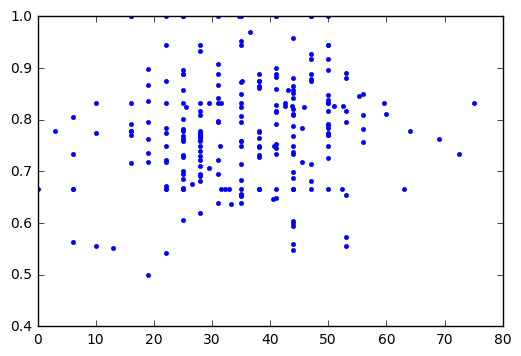

In [127]:
plt.plot(X_train['Mathematics'], y_train,'.')

In [128]:
model_ols = LinearRegression().fit(np.matrix(X_train['Mathematics']).T, y_train)
model_ols.coef_

array([ 0.00102252])

In [129]:
model_ols, model_lassocv, l1, l2, pvalue, output = regression(X_train, y_train)
print output

[0.24936349082042664, 0.11886813014204332, 0.12287940460508907, 0.53784042600927195, 0.71354722472309307, 0.63496298758630909, 35, 4, 2]


In [130]:
CoefTable = create_CoefTable(model_ols, model_lassocv, l1, l2, pvalue)
IndexTable = create_IndexTable(CoefTable, np.mean(dbig[keyword]))
#pd.concat([IndexTable.sort_values(by='score')[:5],IndexTable.sort_values(by='score')[-5:]])
IndexTable.sort_values(by='score')

,coef_ols,coef_lassocv,coef_ols_rfe,ols,lassocv,ols_rfe,score
index,,,,,,,
Social Perceptiveness,-0.003485,0.000000,0.000000,-0.444662,0.000000,0.000000,-0.148221
Systems Evaluation,-0.002005,0.000000,0.000000,-0.255874,0.000000,0.000000,-0.085291
Management of Personnel Resources,-0.001373,0.000000,0.000000,-0.175181,0.000000,0.000000,-0.058394
Negotiation,-0.001082,0.000000,0.000000,-0.138085,0.000000,0.000000,-0.046028
Technology Design,-0.000926,-0.000000,0.000000,-0.118170,-0.000000,0.000000,-0.039390
Writing,-0.000821,0.000000,0.000000,-0.104781,0.000000,0.000000,-0.034927
Management of Financial Resources,-0.000399,0.000000,0.000000,-0.050960,0.000000,0.000000,-0.016987
Monitoring,-0.000387,0.000000,0.000000,-0.049361,0.000000,0.000000,-0.016454
Instructing,-0.000367,0.000000,0.000000,-0.046829,0.000000,0.000000,-0.015610


In [131]:
dSummary[keyword] = IndexTable['score']

In [132]:
dSummary

,Transferability,JobZone,LevelOfCompetition,JobSatisfaction_PayScale,JobMeaning_PayScale,Wage_PayScale,Wage_BLS,RiskOfAutomation,JobSatisfaction_GSS
Active Learning,0.326332,0.379059,0.573836,0.223553,-0.049714,0.112420,0.294334,-0.408352,0.275881
Active Listening,0.769504,-0.094298,-0.070283,-0.033264,0.040298,-0.313650,-0.133484,-0.197263,0.063492
Complex Problem Solving,0.347553,0.141818,0.089406,-0.013635,0.001371,0.946684,0.972528,-0.069026,0.037434
Coordination,0.490399,-0.219109,0.065650,0.006922,-0.097550,-0.078285,0.002584,-0.270707,0.057620
Critical Thinking,0.593723,0.420011,0.042740,0.062990,0.069748,0.974061,0.731563,-1.326864,0.011320
Equipment Maintenance,-0.711690,0.043375,0.034381,0.013119,0.027825,-0.242051,0.049473,-0.262214,0.000000
Equipment Selection,-0.688951,0.024488,0.000000,-0.027021,0.000000,0.000000,-0.132703,-0.044732,0.000000
Installation,-0.891547,0.125590,0.000000,0.000000,0.000000,0.000000,0.004338,0.034060,0.000000
Instructing,0.223327,0.256220,0.054521,0.035416,0.078028,-0.235519,0.024147,-0.587270,-0.015610
Judgment and Decision Making,0.443466,0.375683,0.363652,0.100377,0.143790,1.461735,0.554798,0.203686,0.036577


In [133]:
#Now go back - loop to the next keyword.

In [134]:
dSummary.reset_index().to_csv(DataDir + '02/ScoreAllMeasures_' + interest +'.csv')